In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
ticker = ['HBLPOWER.BO','TTML.BO','FEDERALBNK.BO','TRIDENT.BO']

In [3]:
my_ticker = pd.DataFrame()

for t in ticker :
    my_ticker[t] = wb.DataReader(t,data_source='yahoo',start='2010-01-01')['Adj Close']

TypeError: string indices must be integers

In [13]:
my_ticker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2973 entries, 2010-01-04 to 2022-01-18
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HBLPOWER.BO    2973 non-null   float64
 1   TTML.BO        2973 non-null   float64
 2   FEDERALBNK.BO  2973 non-null   float64
 3   TRIDENT.BO     2973 non-null   float64
dtypes: float64(4)
memory usage: 116.1 KB


In [14]:
my_ticker

,HBLPOWER.BO,TTML.BO,FEDERALBNK.BO,TRIDENT.BO
Date,,,,
2010-01-04,33.964806,22.839439,19.988907,1.086690
2010-01-05,34.096954,24.021519,20.277121,1.077371
2010-01-06,34.008846,23.641563,20.667067,1.075938
2010-01-07,33.304005,23.472696,20.823893,1.119663
2010-01-08,33.964806,23.430479,20.989197,1.124681
...,...,...,...,...
2022-01-12,63.750000,276.500000,98.449997,58.849998
2022-01-13,63.049999,262.700012,100.650002,61.750000
2022-01-14,63.299999,249.600006,99.500000,64.800003


<AxesSubplot:xlabel='Date'>

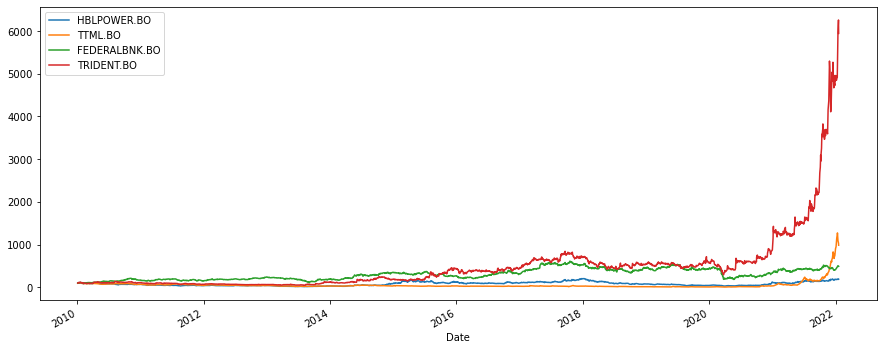

In [16]:
(my_ticker/my_ticker.iloc[0] *100).plot(figsize = (15,6))

In [17]:
returns = (my_ticker / my_ticker.shift(1)) - 1

In [18]:
returns

,HBLPOWER.BO,TTML.BO,FEDERALBNK.BO,TRIDENT.BO
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.003891,0.051756,0.014419,-0.008575
2010-01-06,-0.002584,-0.015817,0.019231,-0.001331
2010-01-07,-0.020725,-0.007143,0.007588,0.040640
2010-01-08,0.019841,-0.001799,0.007938,0.004481
...,...,...,...,...
2022-01-12,-0.028201,-0.049991,0.020207,0.049955
2022-01-13,-0.010980,-0.049910,0.022346,0.049278
2022-01-14,0.003965,-0.049867,-0.011426,0.049393


In [19]:
weights = np.array([0.25,0.25,0.25,0.25])

In [25]:
np.dot(returns, weights)

array([        nan,  0.01537257, -0.00012532, ..., -0.00198367,
        0.01779151, -0.03676613])

In [29]:
annual_returns = returns.mean() * 250
annual_returns

HBLPOWER.BO      0.202549
TTML.BO          0.338805
FEDERALBNK.BO    0.201836
TRIDENT.BO       0.470058
dtype: float64

In [30]:
np.dot(annual_returns, weights) 

0.30331217097259716

In [32]:
portfolio = str(round(np.dot(annual_returns, weights),5 )*100) + '%'
print(portfolio)

30.331000000000003%
